# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations

In [2]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

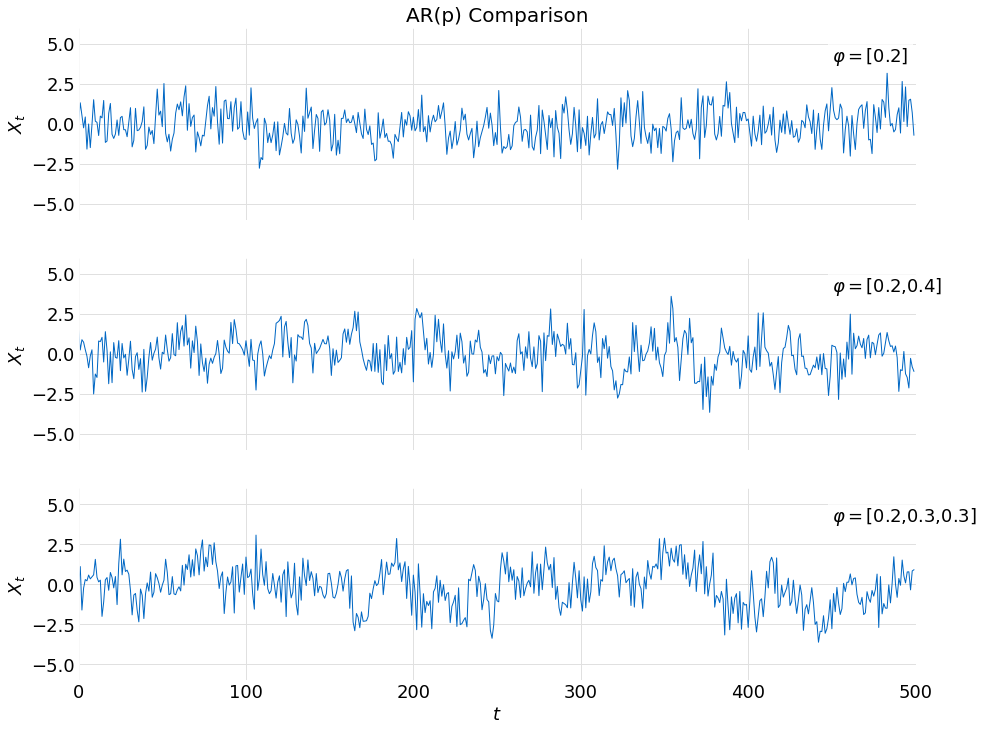

In [3]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = numpy.array([ar1[:500], ar2[:500], ar3[:500]])
plots.time_series_stack(samples, labels, [-6.0, 6.0], title)

## Estimation of $\text{ARMA}(p)$ Parameters

$\text{ARMA}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1)

The parameter used in the $\text{AR}(p)$ simulation is $\varphi = 0.2$

In [4]:
arima.yw_acf(ar1, 1)

array([0.20445273])

In [5]:
result = arima.arma_estimate(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20446902]),
 array([0.01259681, 0.00985813, 0.01436746]))

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14204.083
Date:                Mon, 14 Mar 2022   AIC                          28414.166
Time:                        12:48:09   BIC                          28435.797
Sample:                             0   HQIC                         28421.488
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.013      0.617      0.538      -0.017       0.032
ar.L1          0.2045      0.010     20.741      0.000       0.185       0.224
sigma2         1.0029      0.014     69.801      0.000       0.975       1.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.96   Prob(JB):                         0.52
Heteroskedasticity (H):               0.97   Skew:                            -0.01
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.4]$

In [7]:
arima.yw_acf(ar2, 2)

array([0.20875625, 0.39819628])

In [8]:
result = arima.arma_estimate(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20880522, -0.39833922]),
 array([0.02544879, 0.00910549, 0.00923154, 0.01399077]))

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14190.392
Date:                Mon, 14 Mar 2022   AIC                          28388.785
Time:                        12:48:09   BIC                          28417.626
Sample:                             0   HQIC                         28398.547
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0248      0.025     -0.973      0.331      -0.075       0.025
ar.L1          0.2088      0.009     22.932      0.000       0.191       0.227
ar.L2          0.3983      0.009     43.150      0.000       0.380       0.416
sigma2         1.0001      0.014     71.486      0.000       0.973       1.028
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.67   Prob(JB):                         0.63
Heteroskedasticity (H):               1.04   Skew:                            -0.01
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.3, 0.3]$

In [10]:
arima.yw_acf(ar3, 3)

array([0.18900947, 0.29134225, 0.30725883])

In [11]:
result = arima.arma_estimate(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.18897063, -0.29120064, -0.3072986 ]),
 array([0.04690201, 0.00932794, 0.00919479, 0.00942301, 0.01398705]))

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14158.207
Date:                Mon, 14 Mar 2022   AIC                          28326.415
Time:                        12:48:10   BIC                          28362.467
Sample:                             0   HQIC                         28338.618
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1006      0.047      2.145      0.032       0.009       0.193
ar.L1          0.1890      0.009     20.259      0.000       0.171       0.207
ar.L2          0.2912      0.009     31.670      0.000       0.273       0.309
ar.L3          0.3073      0.009     32.612      0.000       0.289       0.326
sigma2         0.9937      0.014     71.043      0.000       0.966       1.021
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.58   Prob(JB):                         0.92
Heteroskedasticity (H):               1.02   Skew:                             0.00
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""